RMSE: 0.4429 (em centenas de milhares de USD)
R²: 0.8503


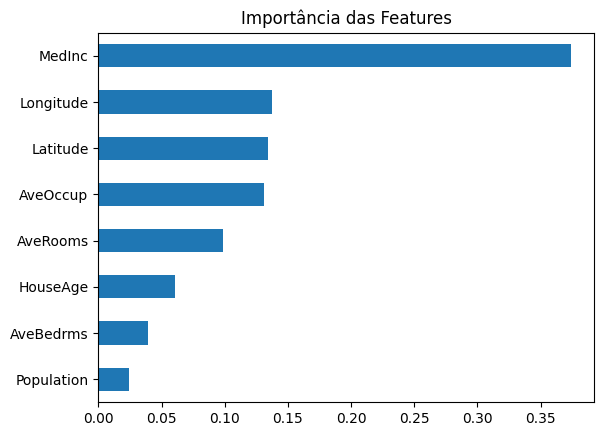

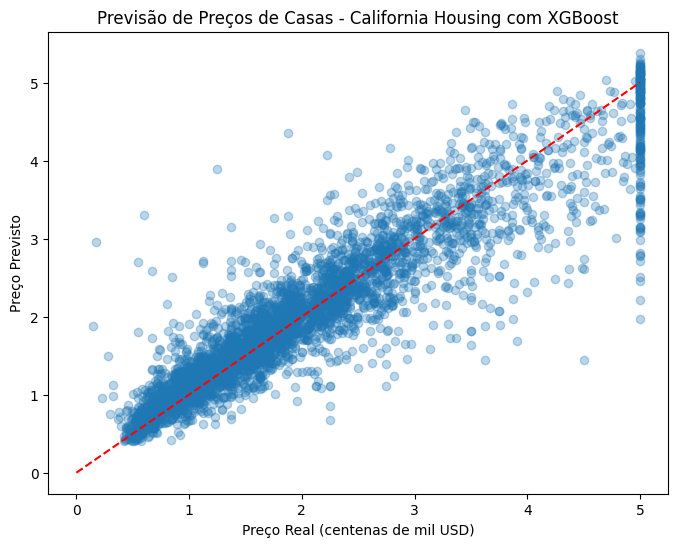

In [1]:
# 1️⃣ Instalar dependências (se necessário)
# pip install xgboost scikit-learn matplotlib pandas

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 2️⃣ Carregar dataset California Housing
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target  # preço mediano em centenas de milhares de dólares

# 3️⃣ Dividir dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Criar e treinar o modelo XGBoost
model = XGBRegressor(
    n_estimators=500,       # número de árvores
    learning_rate=0.05,     # taxa de aprendizagem
    max_depth=6,            # profundidade máxima das árvores
    subsample=0.8,          # percentagem de dados usada por árvore
    colsample_bytree=0.8,   # percentagem de features usadas por árvore
    random_state=42
)
model.fit(X_train, y_train)

# 5️⃣ Fazer previsões
y_pred = model.predict(X_test)

# 6️⃣ Avaliação do modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f} (em centenas de milhares de USD)")
print(f"R²: {r2:.4f}")

# 7️⃣ Importância das variáveis
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind="barh", title="Importância das Features")
plt.show()

# 8️⃣ Comparação real vs previsto
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, 5], [0, 5], color="red", linestyle="--")  # linha ideal (previsão perfeita)
plt.xlabel("Preço Real (centenas de mil USD)")
plt.ylabel("Preço Previsto")
plt.title("Previsão de Preços de Casas - California Housing com XGBoost")
plt.show()





## 🧠 Explicação:

* **Contexto:** Cada linha representa uma área geográfica da Califórnia, com variáveis socioeconómicas e físicas.
* **Objetivo:** Prever o preço mediano das casas nessa área.
* **XGBoost:** Constrói várias árvores de decisão que aprendem de forma sequencial, corrigindo erros anteriores.
* **RMSE:** Mostra o erro médio (em centenas de mil USD).
* **R²:** Mede a qualidade da previsão (quanto mais perto de 1, melhor).
* **Gráfico real vs previsto:** Permite ver se o modelo segue bem a tendência real.

